In [21]:
#FIRST CELL: set these variables to limit GPU usage.
import os 
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true' #this is required
os.environ['CUDA_VISIBLE_DEVICES'] = '1' #set to '0' for GPU0, '1' for GPU1 or '2' for GPU2

In [22]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [23]:
def convert_to_np(dataset):
    arr2d = dataset.to_numpy()
    arr1d = arr2d.flatten()
    
    return arr1d

In [24]:
csvlist = os.listdir("recordings")
csvlist.sort()

In [25]:
dataset = {}
dataset['label'] = list()
dataset['data'] = list()

In [26]:
for csv in csvlist:
        if (os.path.isfile("recordings/" + csv)):
            params = csv.split("_");
            timestamp = params[0]
            username = params[1]
            action = params[2]
            
            # there is something wrong with Alper's data - likely problems with the gyroscope sensor
            if(username != "Alper"):
                csvData = pd.read_csv("recordings/" + csv, delimiter=";", index_col = False)
             
                df = pd.DataFrame();

                # Iterate over the columnNames
                for columnName in csvData:
                    df[columnName + "_min"] = [csvData[columnName].min()]
                    df[columnName + "_max"] = [csvData[columnName].max()]
                    df[columnName + "_mean"] = [csvData[columnName].mean()]
                    df[columnName + "_std"] = [csvData[columnName].std()]
                
                dataset['label'].append(username)
                dataset['data'].append(convert_to_np(df))

In [27]:
print(dataset['data'][18])
print(dataset['label'][18])

[-4.42000000e+03 -3.53400000e+03 -3.98738112e+03  2.31127019e+02
 -2.17000000e+03  6.65000000e+02 -7.96341327e+02  1.01633284e+03
 -4.35000000e+02  2.52000000e+02 -5.11433673e+01  1.71751094e+02
 -5.36860000e+04  5.20270000e+04  1.57866173e+03  1.30312192e+04
 -1.43530000e+04  1.80990000e+04 -4.91216837e+02  3.99151186e+03
 -3.16650000e+04  4.85500000e+04 -1.44625357e+03  1.39908216e+04]
Stefan


In [28]:
X, y = dataset["data"], dataset["label"]
train_data, val_data, train_labels, val_labels = train_test_split(X, y, test_size=0.3)

In [29]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn.inspection import DecisionBoundaryDisplay

X, y = dataset["data"], dataset["label"]
train_data, val_data, train_labels, val_labels = train_test_split(X, y, test_size=0.3)


names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "Gaussian Process",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(alpha=1),
    MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter = 1000, alpha = 0.0001, activation = 'relu', learning_rate= 'adaptive', solver = 'adam'), 
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    
]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    print("Starte: " + "  Methode: " + name)
    #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(train_data, train_labels)
    score = clf.score(val_data, val_labels)
    print("Accuracity: " + str(score) + " mit Methode: " + name)
    #i += 1

Starte:   Methode: Nearest Neighbors
Accuracity: 0.7272727272727273 mit Methode: Nearest Neighbors
Starte:   Methode: Linear SVM
Accuracity: 0.7727272727272727 mit Methode: Linear SVM
Starte:   Methode: RBF SVM
Accuracity: 0.7272727272727273 mit Methode: RBF SVM
Starte:   Methode: Decision Tree
Accuracity: 0.6363636363636364 mit Methode: Decision Tree
Starte:   Methode: Random Forest
Accuracity: 0.7272727272727273 mit Methode: Random Forest
Starte:   Methode: Neural Net
Accuracity: 0.5454545454545454 mit Methode: Neural Net
Starte:   Methode: AdaBoost
Accuracity: 0.6818181818181818 mit Methode: AdaBoost
Starte:   Methode: Naive Bayes
Accuracity: 0.7727272727272727 mit Methode: Naive Bayes
Starte:   Methode: QDA
Accuracity: 0.5454545454545454 mit Methode: QDA
Starte:   Methode: Gaussian Process
Accuracity: 0.7272727272727273 mit Methode: Gaussian Process
CPU times: user 8.08 s, sys: 13 s, total: 21.1 s
Wall time: 796 ms


/opt/jupyterhub/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [19]:
%%time
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder


X, y = dataset["data"], dataset["label"]


lb = LabelEncoder()
y = lb.fit_transform(y)



train_data, val_data, train_labels, val_labels = train_test_split(X, y, test_size=0.2, random_state=13)

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
val_data = scaler.fit_transform(val_data)
#val_data = tf.keras.utils.normalize(val_data, axis=1)

np_train_labels = numpy.asarray(train_labels)
np_train_data = numpy.asarray(train_data)

print(np_train_labels.shape)
print(np_train_data.shape)

print(np_train_labels)
print(np_train_data)

from keras.utils.np_utils import to_categorical
categorical_labels = to_categorical(np_train_labels, num_classes=None)

print(categorical_labels.shape)

model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense(1000, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(520, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(200, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(80, activation=tf.nn.relu))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))


model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])



(58,)
(58, 24)
[1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1
 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1]
[[-0.20171722 -0.06401698 -0.14348715 ... -0.44307777 -0.27654191
  -0.41637121]
 [ 0.72213139 -0.84901159 -0.88224974 ... -1.09381337 -0.20904492
  -1.08481822]
 [-0.11727945 -0.51429307 -0.99144629 ...  0.39067723 -0.03622272
   0.29033737]
 ...
 [-0.49476597  2.11563811  0.83166919 ... -0.13249941 -0.77363407
  -0.30750816]
 [ 0.01434415 -0.37482703 -0.73549735 ...  0.53857169  1.02743517
   0.60215183]
 [ 0.06649689  0.60382615  1.26640727 ...  2.92706715 -1.18012431
   2.20412556]]
(58, 2)
CPU times: user 12.8 ms, sys: 1.01 ms, total: 13.8 ms
Wall time: 12.8 ms


In [17]:
model.fit(np_train_data, categorical_labels, epochs=50)

Epoch 1/50
2/2 [==============================] - 1s 5ms/step - loss: 0.6999 - accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 0.5591 - accuracy: 0.7414
Epoch 3/50
2/2 [==============================] - 0s 4ms/step - loss: 0.4930 - accuracy: 0.7414
Epoch 4/50
2/2 [==============================] - 0s 3ms/step - loss: 0.4514 - accuracy: 0.7931
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 0.3928 - accuracy: 0.8448
Epoch 6/50
2/2 [==============================] - 0s 3ms/step - loss: 0.3437 - accuracy: 0.8448
Epoch 7/50
2/2 [==============================] - 0s 4ms/step - loss: 0.3046 - accuracy: 0.8448
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 0.2563 - accuracy: 0.8793
Epoch 9/50
2/2 [==============================] - 0s 3ms/step - loss: 0.2161 - accuracy: 0.8966
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1795 - accuracy: 0.9138
Epoch 11/50
2/2 [======================

#### mit early stop

In [20]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

np_val_data = numpy.asarray(val_data)
np_val_labels = numpy.asarray(val_labels)

history = model.fit(
      np_train_data,
      categorical_labels,
      epochs=150,
      #validation_data=np_val_data,
      callbacks=[callback]
)
  
print(len(history.history['loss']))

Epoch 1/150
2/2 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.5517
Epoch 2/150
2/2 [==============================] - 0s 3ms/step - loss: 0.5424 - accuracy: 0.7414
Epoch 3/150
2/2 [==============================] - 0s 4ms/step - loss: 0.4419 - accuracy: 0.7586
Epoch 4/150
2/2 [==============================] - 0s 3ms/step - loss: 0.3876 - accuracy: 0.8448
Epoch 5/150
2/2 [==============================] - 0s 3ms/step - loss: 0.3335 - accuracy: 0.8448
Epoch 6/150
2/2 [==============================] - 0s 3ms/step - loss: 0.2754 - accuracy: 0.8966
Epoch 7/150
2/2 [==============================] - 0s 3ms/step - loss: 0.2130 - accuracy: 0.9310
Epoch 8/150
2/2 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.9483
Epoch 9/150
2/2 [==============================] - 0s 3ms/step - loss: 0.1325 - accuracy: 0.9655
Epoch 10/150
2/2 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.9828
Epoch 11/150
2/2 [===========

In [30]:
model = RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state =1)
model.fit(train_data, train_labels)
predicted_labels = model.predict(val_data)

print(classification_report(val_labels, predicted_labels))

              precision    recall  f1-score   support

    Jean-Luc       0.67      0.33      0.44         6
      Stefan       0.79      0.94      0.86        16

    accuracy                           0.77        22
   macro avg       0.73      0.64      0.65        22
weighted avg       0.76      0.77      0.74        22



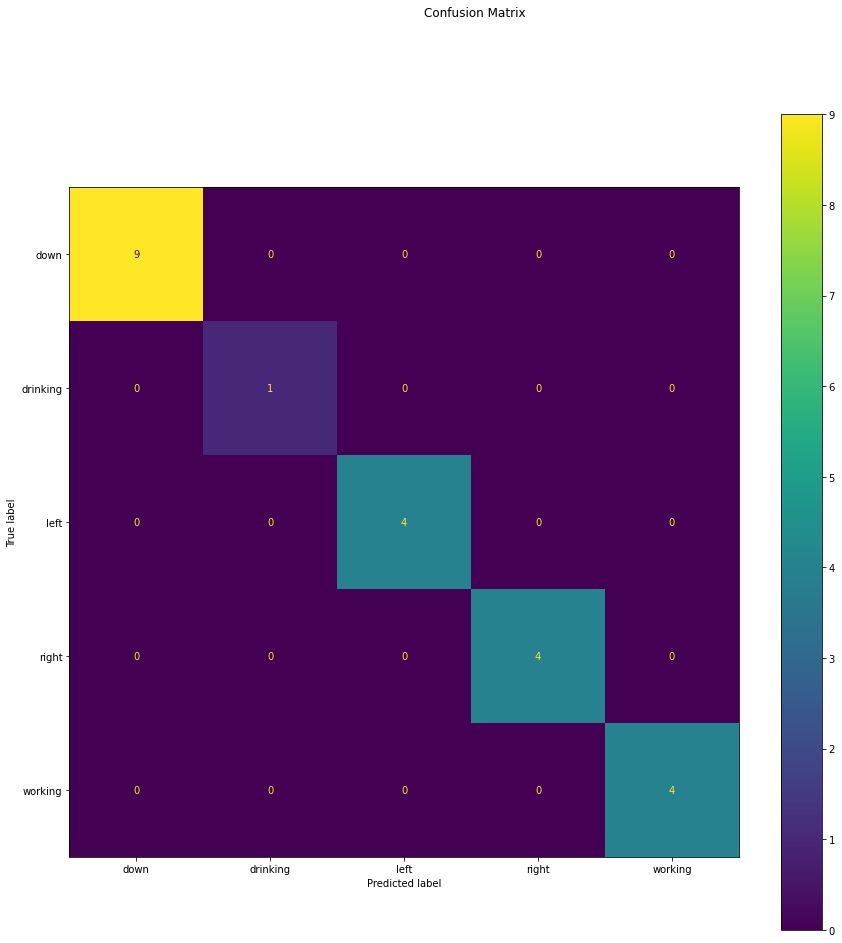

In [68]:
fig, ax = plt.subplots(figsize=(15,15))

disp = ConfusionMatrixDisplay.from_predictions(val_labels, predicted_labels, ax=ax)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

In [ ]:
# LAST CELL: Kill the kernel in the end to prevent idle kernels
exit()